In [1]:
from random import uniform
import math

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [7]:
All_Lost = 0
BasicOptOfferPrice = 35
BasicOptOfferVol = 50
BasicStore = 80
InitAccount = 10000
InitTaxes = 0
Max_Demand = 30
MeanDPrice = 100
OptOfferAcceptDecision = 1
OptOfferBaseVolume = 40
RentRate = 200
Ret_Price = 100
ShopStore = 30
STOP_SELL = 0
TaxesRate = 30
TransferDecision = 1
TransferRate = 150
TransferVol = 30
dt = 1
TIME = 0

In [16]:
timer = 100

Account = InitAccount
Taxes = InitTaxes

BasicPriceRnd = BasicOptOfferVol * (uniform(.7, 1.3))
AddPriceByTime = BasicOptOfferPrice * 0.03 * TIME + BasicOptOfferPrice * 0.01 * TIME * uniform(0, 1)
OfferOnePrice = AddPriceByTime + BasicPriceRnd
RndOfferVolume = round(OptOfferBaseVolume * uniform(0.75, 1.25))
OfferFullPrice = OfferOnePrice * RndOfferVolume
OfferAcceptPossibility = 1 if Account >= OfferFullPrice else 0
SmallOptIncom = OfferAcceptPossibility * OptOfferAcceptDecision * RndOfferVolume

TransferActualVolue = min(BasicStore, TransferVol * TransferDecision) if Account >= TransferRate else 0
GoodsTransfer = math.floor(TransferActualVolue)
Lost = ShopStore + GoodsTransfer - 100 if ShopStore + GoodsTransfer > 100 else 0

Demand = round(Max_Demand * (1 - 1 / (1 + math.exp(-0.05 * (Ret_Price - MeanDPrice)))))
RND_Demand = round(Demand * uniform(0.7, 1.2))
SoldRet = (1 - STOP_SELL) * min(RND_Demand, ShopStore)
Selling = SoldRet
Income = Ret_Price * SoldRet
TaxesCalc = Income * TaxesRate / 100
TaxesPayment = Taxes if TIME % 30 == 0 else 0
DailySpending = min(RentRate, Account)
TransSpend = TransferRate if TransferActualVolue > 0 else 0
VAT = TaxesPayment

print("Начальные значения параметров модели:")
print(f"Account = {Account}")
print(f"BasicStore = {BasicStore}")
print(f"ShopStore = {ShopStore}")
print(f"TransferVolume = {TransferVol}")
print(f"Ret_Price = {Ret_Price}")
print(f"STOP_SELL = {bool(STOP_SELL)}")
print(f"OptOfferAcceptDecision = {bool(OptOfferAcceptDecision)}")
print(f"TransferDecision = {bool(TransferDecision)}")
print(f"RndOfferVolume = {RndOfferVolume}")
print(f"OfferFullPrice = {OfferFullPrice}")
print(f"OfferOnePrice = {OfferOnePrice}")
print(f"RND_Demand = {RND_Demand}\n")

Начальные значения параметров модели:
Account = 10000
BasicStore = 1015
ShopStore = 0
TransferVolume = 35.0
Ret_Price = 110.0
STOP_SELL = False
OptOfferAcceptDecision = False
TransferDecision = False
RndOfferVolume = 42
OfferFullPrice = 6871.603661352532
OfferOnePrice = 163.6096109845841
RND_Demand = 10



In [14]:
perform_changes = True if input("Изменить параметры? (да/нет) ").lower() == 'да' else False

Изменить параметры? (да/нет) нет


In [17]:
account_data = [Account]
taxes_data = [Taxes]
shop_store_data = [ShopStore]
basic_store_data = [BasicStore]

for TIME in range(1, timer + 1):
  if perform_changes:
    change_params = True if input("Изменить параметры? (да/нет) ").lower() == 'да' else False
    if change_params:
      TransferVol = float(input(f"Новое значение TransferVolume: "))
      Ret_Price = float(input(f"Новое значение Ret_Price: "))
      STOP_SELL = 1 if input(f"Изменить значение STOP_SELL? (да/нет) ").lower() == 'да' else 0
      OptOfferAcceptDecision = 1 if input(f"Изменить значение OptOfferAcceptDecision? (да/нет) ").lower() == 'да' else 0
      TransferDecision = 1 if input(f"Изменить значение TransferDecision? (да/нет) ").lower() == 'да' else 0
  Account += dt * (Income - DailySpending - TransSpend - VAT)
  BasicStore += dt * (SmallOptIncom - GoodsTransfer)
  ShopStore += dt * (GoodsTransfer - Selling - Lost)
  Taxes += dt * (TaxesCalc - TaxesPayment)
  All_Lost += dt * Lost

  BasicPriceRnd = BasicOptOfferVol * (uniform(.7, 1.3))
  AddPriceByTime = BasicOptOfferPrice * 0.03 * TIME + BasicOptOfferPrice * 0.01 * TIME * uniform(0, 1)
  OfferOnePrice = AddPriceByTime + BasicPriceRnd
  RndOfferVolume = round(OptOfferBaseVolume * uniform(0.75, 1.25))
  OfferFullPrice = OfferOnePrice * RndOfferVolume
  OfferAcceptPossibility = 1 if Account >= OfferFullPrice else 0
  SmallOptIncom = OfferAcceptPossibility * OptOfferAcceptDecision * RndOfferVolume

  TransferActualVolue = min(BasicStore, TransferVol * TransferDecision) if Account >= TransferRate else 0
  GoodsTransfer = math.floor(TransferActualVolue)
  Lost = ShopStore + GoodsTransfer - 100 if ShopStore + GoodsTransfer > 100 else 0

  Demand = round(Max_Demand * (1 - 1 / (1 + math.exp(-0.05 * (Ret_Price - MeanDPrice)))))
  RND_Demand = round(Demand * uniform(0.7, 1.2))
  SoldRet = (1 - STOP_SELL) * min(RND_Demand, ShopStore)
  Selling = SoldRet
  Income = Ret_Price * SoldRet
  TaxesCalc = (Income-DailySpending-TransSpend)*TaxesRate/100
  TaxesPayment = Taxes if TIME % 30 == 0 else 0
  DailySpending = min(RentRate, Account)
  TransSpend = TransferRate if TransferActualVolue > 0 else 0
  VAT = TaxesPayment
  account_data.append(Account)
  taxes_data.append(Taxes)
  shop_store_data.append(ShopStore)
  basic_store_data.append(BasicStore)

  print(f"Данные на шаге {TIME}")
  print(f"Account = {Account}")
  print(f"BasicStore = {BasicStore}")
  print(f"ShopStore = {ShopStore}")
  print(f"TransferVolume = {TransferVol}")
  print(f"Ret_Price = {Ret_Price}")
  print(f"STOP_SELL = {bool(STOP_SELL)}")
  print(f"OptOfferAcceptDecision = {bool(OptOfferAcceptDecision)}")
  print(f"TransferDecision = {bool(TransferDecision)}")
  print(f"RndOfferVolume = {RndOfferVolume}")
  print(f"OfferFullPrice = {OfferFullPrice}")
  print(f"OfferOnePrice = {OfferOnePrice}")
  print(f"RND_Demand = {RND_Demand}\n")

Данные на шаге 1
Account = 9800.0
BasicStore = 1015
ShopStore = 0
TransferVolume = 35.0
Ret_Price = 110.0
STOP_SELL = False
OptOfferAcceptDecision = False
TransferDecision = False
RndOfferVolume = 35
OfferFullPrice = 1639.1067078270057
OfferOnePrice = 46.83162022362873
RND_Demand = 12

Данные на шаге 2
Account = 9600.0
BasicStore = 1015
ShopStore = 0
TransferVolume = 35.0
Ret_Price = 110.0
STOP_SELL = False
OptOfferAcceptDecision = False
TransferDecision = False
RndOfferVolume = 35
OfferFullPrice = 1369.302096278763
OfferOnePrice = 39.12291703653609
RND_Demand = 9

Данные на шаге 3
Account = 9400.0
BasicStore = 1015
ShopStore = 0
TransferVolume = 35.0
Ret_Price = 110.0
STOP_SELL = False
OptOfferAcceptDecision = False
TransferDecision = False
RndOfferVolume = 50
OfferFullPrice = 2324.202861274427
OfferOnePrice = 46.48405722548854
RND_Demand = 12

Данные на шаге 4
Account = 9200.0
BasicStore = 1015
ShopStore = 0
TransferVolume = 35.0
Ret_Price = 110.0
STOP_SELL = False
OptOfferAcceptDeci

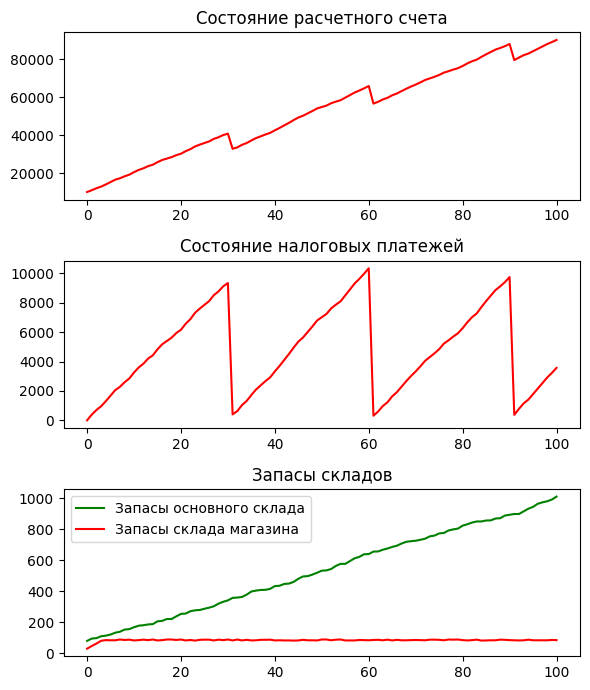

In [11]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(6, 7))

ax[0].set_title("Состояние расчетного счета")
ax[0].plot(account_data, color='r')

ax[1].set_title("Состояние налоговых платежей")
ax[1].plot(taxes_data, color='r')

ax[2].set_title("Запасы складов")
ax[2].plot(basic_store_data, label='Запасы основного склада', color='g')
ax[2].plot(shop_store_data, label='Запасы склада магазина', color='r')
ax[2].legend(loc='upper left')

fig.tight_layout()
plt.show()